**Import all libraries that you will need**

In [203]:
import numpy as np
import pandas as pd
import requests
import os
import tweepy
import wptools
import json
import seaborn as sns # --> to show your visualizations in the seaborn frame 
import matplotlib.pyplot as plt
# It helps you make your visalization faster, but if you wanna more details go to matplotlib (previous line)
%matplotlib inline

# Gathering

- twitter-archive-enhanced.csv
- image predictions by `requests`
- retweets and favourites (likes) by `API - tweepy`

In [204]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### image predictions

In [95]:
folder_name = 'image_predictions'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
tsv_file = os.listdir(folder_name)[0]
tsv_file

'image-predictions.tsv'

In [96]:
df_img_predictions = pd.read_csv(folder_name + '/' + tsv_file, sep='\t')
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### retweets and favourites (likes)

In [5]:
consumer_key = 'JasZfz0P8Gjk1MtJYEKv5UFu3'
consumer_secret = 'kygCFFm38X52RaHcGIavRcEBlCAR85ckpeAnTkNluamM8oyNnr'
access_token = '1054471292194357248-K7WgJqP3vb1UuNiyCZvqdzFmXL7TCJ'
access_secret = '3OOIJXBVc97UsJXebLyCAdJPRk8pCFc1WnUCAE1KzOdHh'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
tweet_ids = list(df_twitter_archive['tweet_id'])

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
        
    except:
        print("You have an error with this tweet's id: " + str(tweet))

You have an error with this tweet's id: 888202515573088257
You have an error with this tweet's id: 873697596434513921
You have an error with this tweet's id: 872668790621863937
You have an error with this tweet's id: 872261713294495745
You have an error with this tweet's id: 869988702071779329
You have an error with this tweet's id: 866816280283807744
You have an error with this tweet's id: 861769973181624320
You have an error with this tweet's id: 856602993587888130
You have an error with this tweet's id: 851953902622658560
You have an error with this tweet's id: 845459076796616705
You have an error with this tweet's id: 844704788403113984
You have an error with this tweet's id: 842892208864923648
You have an error with this tweet's id: 837366284874571778
You have an error with this tweet's id: 837012587749474308
You have an error with this tweet's id: 829374341691346946
You have an error with this tweet's id: 827228250799742977
You have an error with this tweet's id: 8127478057186426

In [7]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)
    
with open('tweet_json.txt') as file:
    data = json.load(file)
    
df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})

In [8]:
df_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
df_tweets.sample(10)

,tweet_id,retweets,favorites
182,855857698524602368,1949,11222
600,796177847564038144,14036,0
2051,670838202509447168,637,1029
895,756651752796094464,1252,4905
596,796759840936919040,2982,11661
1788,676776431406465024,1908,4741
855,760893934457552897,940,3726
686,785872687017132033,1762,6614
178,856288084350160898,15,487
1067,737445876994609152,4253,9856


In [9]:
df_tweets.shape

(2331, 3)

# Assessment

### Twitter archived data

In [97]:
df_twitter_archive.shape

(2356, 17)

In [98]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [99]:
df_twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [100]:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2001,672482722825261057,NaN,NaN,2015-12-03 18:29:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is light saber pup. Ready to fight off ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672482722...,10,10,light,None,None,None,None
1135,728409960103686147,NaN,NaN,2016-05-06 02:24:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wallace. He's a skater pup. He said se...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728409960...,10,10,Wallace,None,None,None,None
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
1519,690735892932222976,NaN,NaN,2016-01-23 03:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Peaches. She's a Dingleberry Zand...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690735892...,13,10,Peaches,None,None,None,None


In [101]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [102]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [103]:
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [104]:
df_twitter_archive['name'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351

In [105]:
sum(df_twitter_archive['expanded_urls'].duplicated())

137

In [106]:
df_twitter_archive['expanded_urls'][926]

'https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/679158373988876288/photo/1'

### Image predictions data

In [107]:
df_img_predictions.shape

(2075, 12)

In [108]:
df_img_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [109]:
df_img_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [110]:
df_img_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
183,669353438988365824,https://pbs.twimg.com/media/CUoFZTyW4AE70iD.jpg,1,teddy,0.379656,False,Pembroke,0.212343,True,chow,0.096995,True
1444,775733305207554048,https://pbs.twimg.com/media/CsP1UvaW8AExVSA.jpg,1,long-horned_beetle,0.613852,False,ox,0.029473,False,rhinoceros_beetle,0.027806,False
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False


In [111]:
df_img_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [112]:
df_img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Tweets data

In [26]:
df_tweets.to_csv(r'C:\Users\Taha CompuTech\Desktop\tweets.csv', index = False)

In [27]:
df_tweets.shape

(2331, 3)

In [28]:
df_tweets.head()

,tweet_id,retweets,favorites
0,892420643555336193,7378,35074
1,892177421306343426,5497,30368
2,891815181378084864,3633,22829
3,891689557279858688,7555,38352
4,891327558926688256,8141,36630


In [29]:
df_tweets.tail()

,tweet_id,retweets,favorites
2326,666049248165822465,38,94
2327,666044226329800704,122,260
2328,666033412701032449,39,107
2329,666029285002620928,41,118
2330,666020888022790149,444,2344


In [30]:
df_tweets.sample(10)

,tweet_id,retweets,favorites
1667,681320187870711809,707,2542
1798,676533798876651520,519,1779
854,761004547850530816,3370,11063
705,782969140009107456,7193,23757
1733,678755239630127104,3098,6768
531,805487436403003392,2482,8699
1395,698342080612007937,925,2184
711,781955203444699136,3295,10964
1228,710844581445812225,651,2447
956,749774190421639168,1275,4533


In [31]:
df_tweets.describe()

,retweets,favorites
count,2331.000000,2331.000000
mean,2594.141570,7324.565423
std,4388.404605,11375.812842
min,1.000000,0.000000
25%,526.000000,1270.000000
50%,1210.000000,3180.000000
75%,3004.500000,8954.000000
max,74457.000000,150820.000000


In [32]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id     2331 non-null object
retweets     2331 non-null int64
favorites    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


## Issues

**`Twitter archived data`**
#### Quality
* There are five columns have many NaN values (`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
* The `text` column shows that there are some tweets which is retweeted tweets and mentions tweets
* These columns(`tweet_id`, `timestamp`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`) have an incorrect data type.
* `expanded_urls` column somtimes have more than repeated url and somtimes have different urls (splitted by ',')
* `source` columns has some extra strings before and after it
* Find and update incorrect ratings

#### Tidiness
* timestamp column contains year, month, day, and the time
* These columns (`doggo` , `floofer` , `pupper` , `puppo`) should become in the same column
* Joining the datasets should be a part of Tidiness issues
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

**`Image predictions data`**
#### Quality
* `tweet_id` column is int data type
* columns names are not clear enough

#### Tidiness
* None
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _

**`Tweets data`**
#### Quality
* retweets and favorites are float

#### Tidiness
* None

# Cleaning

In [238]:
twitter_archive_clean = df_twitter_archive.copy()
img_predictions_clean = df_img_predictions.copy()
tweets_clean = df_tweets.copy()

#### Define
* convert all ids features from float to string
* convert timestamp and retweeted_status_timestamp from object to datetime

#### Code

In [239]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype(str)
twitter_archive_clean['retweeted_status_id'] = twitter_archive_clean['retweeted_status_id'].astype(str)
twitter_archive_clean['retweeted_status_user_id'] = twitter_archive_clean['retweeted_status_user_id'].astype(str)

twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

#### test

In [240]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datet

#### Define
* recorrect all row data that rows with rating denominator != 10
* drop all rows that should do not have any rating

#### Code

In [241]:
twitter_archive_clean.shape

(2356, 17)

In [242]:
incorr = twitter_archive_clean[twitter_archive_clean.rating_denominator != 10]
incorr.to_csv('incorr.csv')

**I made my visual assessment on Excel and solve all issues about the ratings(denominator & numerator) manually**:
* index 313 >>> rating_numerator sould = 13 , rating_denominator sould = 10
* index 516 >>> rating_numerator sould = None , rating_denominator sould = None (Drop)
* index 784 >>> rating_numerator sould = 14 , rating_denominator sould = 10
* index 1068 >>> rating_numerator sould = 14 , rating_denominator sould = 10
* index 1165 >>> rating_numerator sould = 13 , rating_denominator sould = 10
* index 1202 >>> rating_numerator sould = 11 , rating_denominator sould = 10
* index 1274 >>> rating_numerator sould = None , rating_denominator sould = None (Drop)
* index 1662 >>> rating_numerator sould = 10 , rating_denominator sould = 10
* index 2335 >>> rating_numerator sould = 9 , rating_denominator sould = 10

In [243]:
# Convert data type of rating_numerator and rating_denominator column to string
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(str)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(str)
#twitter_archive_clean.info()

In [244]:
#for index >>> 313
twitter_archive_clean['rating_numerator'][313] = twitter_archive_clean['rating_numerator'][313].replace('960', '13')
twitter_archive_clean['rating_denominator'][313] = twitter_archive_clean['rating_denominator'][313].replace('0', '10')

#for index >>> 784
twitter_archive_clean['rating_numerator'][784] = twitter_archive_clean['rating_numerator'][784].replace('9', '14')
twitter_archive_clean['rating_denominator'][784] = twitter_archive_clean['rating_denominator'][784].replace('11', '10')

#for index >>> 1068
twitter_archive_clean['rating_numerator'][1068] = twitter_archive_clean['rating_numerator'][1068].replace('9', '14')
twitter_archive_clean['rating_denominator'][1068] = twitter_archive_clean['rating_denominator'][1068].replace('11', '10')

#for index >>> 1165
twitter_archive_clean['rating_numerator'][1165] = twitter_archive_clean['rating_numerator'][1165].replace('4', '13')
twitter_archive_clean['rating_denominator'][1165] = twitter_archive_clean['rating_denominator'][1165].replace('20', '10')

#for index >>> 1202
twitter_archive_clean['rating_numerator'][1202] = twitter_archive_clean['rating_numerator'][1202].replace('50', '11')
twitter_archive_clean['rating_denominator'][1202] = twitter_archive_clean['rating_denominator'][1202].replace('50', '10')


#for index >>> 1662
twitter_archive_clean['rating_numerator'][1662] = twitter_archive_clean['rating_numerator'][1662].replace('7', '10')
twitter_archive_clean['rating_denominator'][1662] = twitter_archive_clean['rating_denominator'][1662].replace('11', '10')

#for index >>> 2335
twitter_archive_clean['rating_numerator'][2335] = twitter_archive_clean['rating_numerator'][2335].replace('1', '9')
twitter_archive_clean['rating_denominator'][2335] = twitter_archive_clean['rating_denominator'][2335].replace('2', '10')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCop

In [245]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(int)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(int)

In [246]:
twitter_archive_clean.shape

(2356, 17)

In [247]:
#for index >>> 516 & 1274
twitter_archive_clean.drop(twitter_archive_clean.index[[516,1274]], inplace=True)

#### test

In [248]:
print(twitter_archive_clean['rating_numerator'][313])
twitter_archive_clean['rating_denominator'][313] 

13


10

In [249]:
twitter_archive_clean.shape

(2354, 17)

In [250]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2354 non-null object
in_reply_to_status_id         2354 non-null object
in_reply_to_user_id           2354 non-null object
timestamp                     2354 non-null datetime64[ns]
source                        2354 non-null object
text                          2354 non-null object
retweeted_status_id           2354 non-null object
retweeted_status_user_id      2354 non-null object
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2295 non-null object
rating_numerator              2354 non-null int64
rating_denominator            2354 non-null int64
name                          2354 non-null object
doggo                         2354 non-null object
floofer                       2354 non-null object
pupper                        2354 non-null object
puppo                         2354 non-null object
dtypes: datet

#### Define
* Drop the following columns because they have many many NaN values !!! :
    * `in_reply_to_status_id`
    * `in_reply_to_user_id`
    * `retweeted_status_id`
    * `retweeted_status_user_id`
    * `retweeted_status_timestamp`
    
#### Code

In [251]:
dropped_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']
twitter_archive_clean.drop(dropped_list, axis=1, inplace=True)

#### test

In [252]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [253]:
twitter_archive_clean.shape

(2354, 12)

#### Define
* Drop any retweet tweet data row
* Drop any mentioned tweet data row

#### Code

In [254]:
retweets = twitter_archive_clean['text'].str.startswith('RT')                                                                   
twitter_archive_clean = twitter_archive_clean[~retweets].reset_index(drop=True) 

In [255]:
mentioned = twitter_archive_clean['text'].str.startswith('@')                                                                   
twitter_archive_clean = twitter_archive_clean[~mentioned].reset_index(drop=True) 

#### test

In [256]:
twitter_archive_clean.shape

(2148, 12)

In [257]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [258]:
twitter_archive_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2143,666049248165822465,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2144,666044226329800704,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2145,666033412701032449,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2146,666029285002620928,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2147,666020888022790149,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [259]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1658,675362609739206656,2015-12-11 17:12:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She loves that shoe. Still no s...,https://twitter.com/dog_rates/status/675362609...,12,10,Daisy,None,None,None,None
458,800459316964663297,2016-11-20 22:02:27,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,https://twitter.com/dog_rates/status/800459316...,12,10,None,None,None,pupper,None
502,793120401413079041,2016-10-31 16:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,None,None,None,None
1814,672095186491711488,2015-12-02 16:49:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,https://twitter.com/dog_rates/status/672095186...,9,10,Tuco,None,None,None,None
1749,673636718965334016,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10,10,a,None,None,None,None
1856,671163268581498880,2015-11-30 03:06:07,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,https://twitter.com/dog_rates/status/671163268...,8,10,None,None,None,None,None
224,840696689258311684,2017-03-11 22:51:24,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,10,None,None,None,None,None
992,717537687239008257,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
811,747594051852075008,2016-06-28 00:54:46,"<a href=""http://twitter.com/download/iphone"" r...",Again w the sharks guys. This week is about do...,https://twitter.com/dog_rates/status/747594051...,11,10,None,None,None,None,None
518,789986466051088384,2016-10-23 00:27:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Happy. He's a bathtub reviewer. Seems ...,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,None,None,None,None


#### Define 
* drop any NaN values in `expanded_urls` column
* split `expanded_urls` column by ','
* then take just one url from the repeated ones

#### Code

In [260]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

In [261]:
twitter_archive_clean.shape

(2113, 12)

In [262]:
for url in twitter_archive_clean['expanded_urls']:
    if ',' in url:
        links = url.split(',')
        twitter_archive_clean['expanded_urls'] = twitter_archive_clean['expanded_urls'].replace(url, links[-1])
    else:
        pass

#### test

In [263]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

In [264]:
twitter_archive_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
23,887343217045368832,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
1423,684588130326986752,2016-01-06 04:11:43,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper just got his first kiss. 12/10 he'...,https://vine.co/v/ihWIxntjtO7,12,10,None,None,None,pupper,None
1972,669015743032369152,2015-11-24 04:52:37,"<a href=""http://twitter.com/download/iphone"" r...",Super rare dog right here guys. Doesn't bark. ...,https://twitter.com/dog_rates/status/669015743...,10,10,None,None,None,None,None
329,823322678127919110,2017-01-23 00:13:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. He's got the fastest paws in th...,https://twitter.com/dog_rates/status/823322678...,11,10,Wyatt,None,None,None,None
107,868622495443632128,2017-05-28 00:18:35,"<a href=""http://twitter.com/download/iphone"" r...",Here's a h*ckin peaceful boy. Unbothered by th...,https://twitter.com/dog_rates/status/868622495...,13,10,None,None,None,None,None
2057,667534815156183040,2015-11-20 02:47:56,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None
320,825026590719483904,2017-01-27 17:04:02,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Pablo. He's one gorgeous puppo. A...,https://twitter.com/dog_rates/status/825026590...,12,10,Pablo,None,None,None,puppo
776,750071704093859840,2016-07-04 21:00:04,"<a href=""http://twitter.com/download/iphone"" r...",Pause your cookout and admire this pupper's ni...,https://twitter.com/dog_rates/status/750071704...,10,10,None,None,None,pupper,None
1425,684538444857667585,2016-01-06 00:54:18,"<a href=""http://twitter.com/download/iphone"" r...","After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,12,10,None,None,None,None,None
317,825829644528148480,2017-01-29 22:15:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None


In [265]:
twitter_archive_clean['expanded_urls'].sample(15)

959     https://twitter.com/dog_rates/status/724004602...
255     https://twitter.com/dog_rates/status/834458053...
371     https://twitter.com/dog_rates/status/816816676...
746                         https://vine.co/v/OEppMFbejFz
1307    https://twitter.com/dog_rates/status/691321916...
1987    https://twitter.com/dog_rates/status/668902994...
1954    https://twitter.com/dog_rates/status/669567591...
1447    https://twitter.com/dog_rates/status/683481228...
784     https://twitter.com/dog_rates/status/749417653...
1421    https://twitter.com/dog_rates/status/684800227...
856     https://twitter.com/dog_rates/status/742161199...
420     https://twitter.com/dog_rates/status/808733504...
797     https://twitter.com/dog_rates/status/748568946...
801     https://twitter.com/dog_rates/status/748307329...
1714    https://twitter.com/dog_rates/status/674265582...
Name: expanded_urls, dtype: object

#### Define
* rewrite the image prediction columns name to be more clear

#### Code

In [266]:
img_predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [267]:
columns = ['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1', 'breed_1',
           'prediction_2', 'confidence_2', 'breed_2',
           'prediction_3', 'confidence_3', 'breed_3']
img_predictions_clean.columns = columns

#### test

In [268]:
img_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


#### Define
* the source column has some extra strings after and before it (should be removed)

#### Code

In [269]:
for url in twitter_archive_clean['source']:
    url = url.split('"')[1]
    twitter_archive_clean['source'] = url

#### test

In [270]:
twitter_archive_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Define
* extract from `timestamp`:
    * Year
    * Month
    * Day
    * Hour
* then drop timestamp column

#### Code

In [271]:
twitter_archive_clean["year"] = twitter_archive_clean["timestamp"].dt.year
twitter_archive_clean["month"] = twitter_archive_clean["timestamp"].dt.month
twitter_archive_clean["day"] = twitter_archive_clean["timestamp"].dt.day
twitter_archive_clean["hour"] = twitter_archive_clean["timestamp"].dt.hour

**Now i extract the year, month, day number, and hour .. but it will be better if we have week day instead of day number**

In [272]:
twitter_archive_clean.drop('day', axis=1, inplace=True)
twitter_archive_clean["day"] = twitter_archive_clean["timestamp"].dt.weekday_name

In [273]:
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)

#### test

In [274]:
twitter_archive_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,hour,day
0,892420643555336193,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,16,Tuesday
1,892177421306343426,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,0,Tuesday
2,891815181378084864,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7,0,Monday
3,891689557279858688,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7,15,Sunday
4,891327558926688256,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7,16,Saturday


#### Define
* convert `tweet_id` column data type to string

#### Code

In [275]:
img_predictions_clean['tweet_id'] = img_predictions_clean['tweet_id'].astype(str)

#### test

In [276]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id        2075 non-null object
jpg_url         2075 non-null object
img_num         2075 non-null int64
prediction_1    2075 non-null object
confidence_1    2075 non-null float64
breed_1         2075 non-null bool
prediction_2    2075 non-null object
confidence_2    2075 non-null float64
breed_2         2075 non-null bool
prediction_3    2075 non-null object
confidence_3    2075 non-null float64
breed_3         2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

* let's melt the dog stage columns in one column

#### Code

In [277]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'hour', 'day'],
      dtype='object')

In [278]:
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
                                                   'rating_denominator', 'name', 'year', 'month', 'hour', 'day'],
                                                     value_name='dog_stage')

In [279]:
twitter_archive_clean

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,variable,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,16,Tuesday,source,http://twitter.com/download/iphone
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,0,Tuesday,source,http://twitter.com/download/iphone
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,0,Monday,source,http://twitter.com/download/iphone
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017,7,15,Sunday,source,http://twitter.com/download/iphone
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,16,Saturday,source,http://twitter.com/download/iphone
5,891087950875897856,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,2017,7,0,Saturday,source,http://twitter.com/download/iphone
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,2017,7,16,Friday,source,http://twitter.com/download/iphone
7,890729181411237888,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,2017,7,0,Friday,source,http://twitter.com/download/iphone
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,2017,7,16,Thursday,source,http://twitter.com/download/iphone
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017,7,15,Wednesday,source,http://twitter.com/download/iphone


In [280]:
twitter_archive_clean.drop('variable', axis=1, inplace=True)
twitter_archive_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'hour', 'day',
       'dog_stage'],
      dtype='object')

In [281]:
twitter_archive_clean.shape

(10565, 11)

In [282]:
twitter_archive_clean.dog_stage.value_counts()

None                                  8102
http://twitter.com/download/iphone    2113
pupper                                 232
doggo                                   84
puppo                                   24
floofer                                 10
Name: dog_stage, dtype: int64

In [283]:
twitter_archive_clean = twitter_archive_clean.drop_duplicates(['tweet_id','dog_stage'],keep= 'last')

In [284]:
twitter_archive_clean.shape

(4576, 11)

In [285]:
twitter_archive_clean['dog_stage'].value_counts()

None                                  2113
http://twitter.com/download/iphone    2113
pupper                                 232
doggo                                   84
puppo                                   24
floofer                                 10
Name: dog_stage, dtype: int64

#### test

In [286]:
duplicateDFRow = twitter_archive_clean[twitter_archive_clean.duplicated(['tweet_id'])]
duplicateDFRow

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,dog_stage
2122,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017,7,15,Wednesday,doggo
2152,884162670584377345,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2017,7,21,Sunday,doggo
2199,872967104147763200,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,2017,6,0,Friday,doggo
2207,871515927908634625,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2017,6,23,Sunday,doggo
2208,871102520638267392,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758...,14,10,None,2017,6,20,Saturday,doggo
2217,869596645499047938,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,2017,5,16,Tuesday,doggo
2257,858843525470990336,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,None,2017,5,0,Monday,doggo
2269,855851453814013952,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,2017,4,18,Saturday,doggo
2276,854010172552949760,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,2017,4,16,Monday,doggo
2307,846514051647705089,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,2017,3,0,Tuesday,doggo


In [287]:
nones = duplicateDFRow.index[duplicateDFRow['dog_stage'] == 'None'].tolist()

In [288]:
twitter_archive_clean.drop(nones, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [289]:
twitter_archive_clean.shape

(2463, 11)

In [290]:
twitter_archive_clean.sample(10)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,dog_stage
1681,674291837063053312,This is Kenny. He just wants to be included in...,https://twitter.com/dog_rates/status/674291837...,11,10,Kenny,2015,12,18,Tuesday,http://twitter.com/download/iphone
2081,666421158376562688,*internally screaming* 12/10 https://t.co/YMcr...,https://twitter.com/dog_rates/status/666421158...,12,10,None,2015,11,1,Tuesday,http://twitter.com/download/iphone
1873,670442337873600512,Meet Koda. He's large. Looks very soft. Great ...,https://twitter.com/dog_rates/status/670442337...,11,10,Koda,2015,11,3,Saturday,http://twitter.com/download/iphone
465,796865951799083009,This is Tyr. He's just checking on you. Nifty ...,https://twitter.com/dog_rates/status/796865951...,12,10,Tyr,2016,11,0,Friday,http://twitter.com/download/iphone
1342,687841446767013888,13/10 I can't stop watching this (vid by @k8ly...,https://vine.co/v/iOWwUPH1hrw,13,10,None,2016,1,3,Friday,http://twitter.com/download/iphone
1131,704134088924532736,This sneezy pupper is just adorable af. 12/10 ...,https://vine.co/v/igW2OEwu9vg,12,10,None,2016,2,2,Monday,http://twitter.com/download/iphone
53,880935762899988482,This is Louis. He's crossing. It's a big deal....,https://twitter.com/dog_rates/status/880935762...,13,10,Louis,2017,6,23,Friday,http://twitter.com/download/iphone
627,771136648247640064,This is Dixie. She wants to be a ship captain....,https://twitter.com/dog_rates/status/771136648...,11,10,Dixie,2016,9,0,Thursday,http://twitter.com/download/iphone
818,745712589599014916,This is Percy. He fell asleep at the wheel. Ir...,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,2016,6,20,Wednesday,http://twitter.com/download/iphone
1334,688789766343622656,Meet Pubert. He's a Kerplunk Rumplestilt. Cann...,https://twitter.com/dog_rates/status/688789766...,8,10,Pubert,2016,1,18,Sunday,http://twitter.com/download/iphone


In [291]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweets_clean,
                        how = 'inner', on = 'tweet_id')
twitter_archive_clean = pd.merge(twitter_archive_clean, img_predictions_clean,
                        how = 'inner', on = 'tweet_id')

In [292]:
twitter_archive_clean.shape

(2300, 24)

In [293]:
twitter_archive_clean.sample(4)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
931,741793263812808706,When your crush won't pay attention to you. Bo...,https://twitter.com/dog_rates/status/741793263...,10,10,None,2016,6,0,Sunday,...,1,kuvasz,0.311325,True,French_bulldog,0.115349,True,Labrador_retriever,0.068533,True
1503,685973236358713344,This is Lorelei. She's contemplating her exist...,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,2016,1,23,Saturday,...,1,Siberian_husky,0.450678,True,Eskimo_dog,0.430275,True,malamute,0.118590,True
844,750101899009982464,Meet Lilah. She agreed on one quick pic. Now s...,https://twitter.com/dog_rates/status/750101899...,11,10,Lilah,2016,7,23,Monday,...,2,golden_retriever,0.316704,True,llama,0.174269,False,Labrador_retriever,0.147364,True
1271,700890391244103680,This is Chet. He's dapper af. His owners want ...,https://twitter.com/dog_rates/status/700890391...,11,10,Chet,2016,2,3,Saturday,...,1,white_wolf,0.166563,False,schipperke,0.122356,True,West_Highland_white_terrier,0.119247,True


## Storing

In [294]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing, and Visualizing Data for this Project

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [317]:
twitter_archive_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'hour', 'day',
       'dog_stage', 'retweets', 'favorites', 'jpg_url', 'img_num',
       'prediction_1', 'confidence_1', 'breed_1', 'prediction_2',
       'confidence_2', 'breed_2', 'prediction_3', 'confidence_3', 'breed_3'],
      dtype='object')

In [318]:
twitter_archive_clean.shape

(2300, 24)

In [319]:
twitter_archive_clean

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,hour,day,...,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,16,Tuesday,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,0,Tuesday,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,0,Monday,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017,7,15,Sunday,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,16,Saturday,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,2017,7,0,Saturday,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13,10,Jax,2017,7,16,Friday,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,2017,7,0,Friday,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,2017,7,16,Thursday,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017,7,15,Wednesday,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [320]:
year_freq = twitter_archive_clean['year'].value_counts()

Text(0.5,1,'Number of tweets in each year')

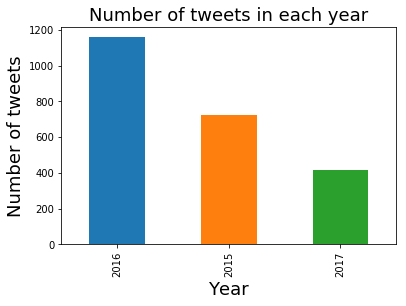

In [321]:
year_freq.plot(x= year_freq.index , y= year_freq, kind='bar')
plt.xlabel("Year", fontsize=18)
plt.ylabel("Number of tweets", fontsize=18)
plt.title('Number of tweets in each year', fontsize=18)

In [322]:
day_freq = twitter_archive_clean['day'].value_counts()

Text(0.5,1,'Number of tweets in each week day')

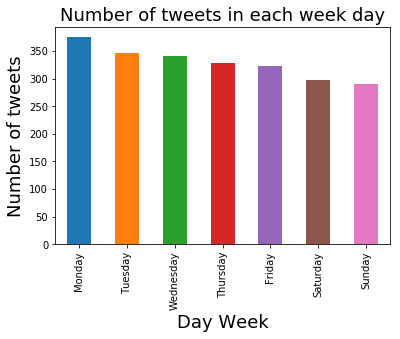

In [323]:
day_freq.plot(x= day_freq.index , y= day_freq, kind='bar')
plt.xlabel("Day Week", fontsize=18)
plt.ylabel("Number of tweets", fontsize=18)
plt.title('Number of tweets in each week day', fontsize=18)

In [324]:
month_freq = twitter_archive_clean['month'].value_counts()

Text(0.5,1,'Number of tweets in each month')

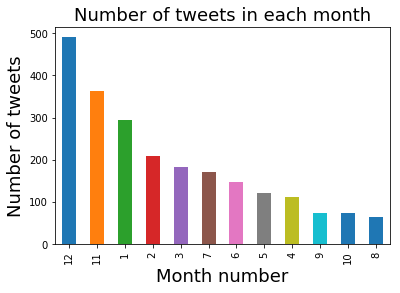

In [325]:
month_freq.plot(x= month_freq.index , y= month_freq, kind='bar')
plt.xlabel("Month number", fontsize=18)
plt.ylabel("Number of tweets", fontsize=18)
plt.title('Number of tweets in each month', fontsize=18)

In [326]:
r_numerator = twitter_archive_clean['rating_numerator'].value_counts()

Text(0.5,1,'Dog Rates Frequencies')

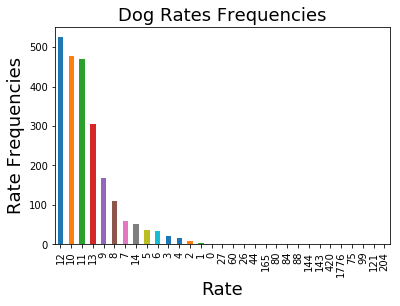

In [327]:
r_numerator.plot(x= r_numerator.index , y= r_numerator, kind='bar')
plt.xlabel("Rate", fontsize=18)
plt.ylabel("Rate Frequencies", fontsize=18)
plt.title('Dog Rates Frequencies', fontsize=18)

In [328]:
twitter_archive_clean.columns

Index(['tweet_id', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'year', 'month', 'hour', 'day',
       'dog_stage', 'retweets', 'favorites', 'jpg_url', 'img_num',
       'prediction_1', 'confidence_1', 'breed_1', 'prediction_2',
       'confidence_2', 'breed_2', 'prediction_3', 'confidence_3', 'breed_3'],
      dtype='object')

In [332]:
dog_stage_p1 = twitter_archive_clean['prediction_1'].value_counts()

Text(0.5,1,'The most 10 dog stages (p1)')

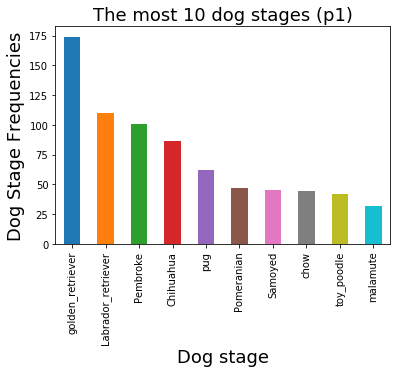

In [333]:
dog_stage_p1.head(10).plot(x= dog_stage_p1.index , y= dog_stage_p1, kind='bar')
plt.xlabel("Dog stage", fontsize=18)
plt.ylabel("Dog Stage Frequencies", fontsize=18)
plt.title('The most 10 dog stages (p1)', fontsize=18)

In [334]:
dog_stage_p2 = twitter_archive_clean['prediction_2'].value_counts()

Text(0.5,1,'The most 10 dog stages (p2)')

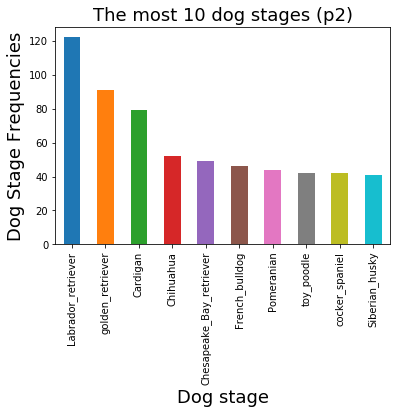

In [335]:
dog_stage_p2.head(10).plot(x= dog_stage_p2.index , y= dog_stage_p2, kind='bar')
plt.xlabel("Dog stage", fontsize=18)
plt.ylabel("Dog Stage Frequencies", fontsize=18)
plt.title('The most 10 dog stages (p2)', fontsize=18)

In [336]:
dog_stage_p3 = twitter_archive_clean['prediction_2'].value_counts()

Text(0.5,1,'The most 10 dog stages (p3)')

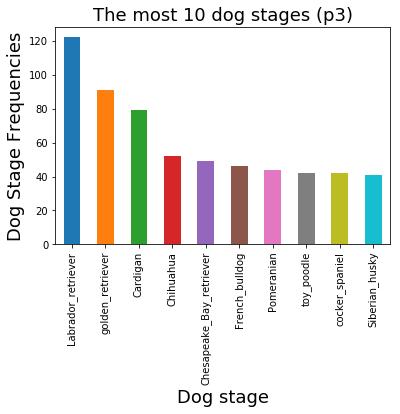

In [337]:
dog_stage_p3.head(10).plot(x= dog_stage_p3.index , y= dog_stage_p3, kind='bar')
plt.xlabel("Dog stage", fontsize=18)
plt.ylabel("Dog Stage Frequencies", fontsize=18)
plt.title('The most 10 dog stages (p3)', fontsize=18)

Text(0.5,1,'Correlation between fav & retweets')

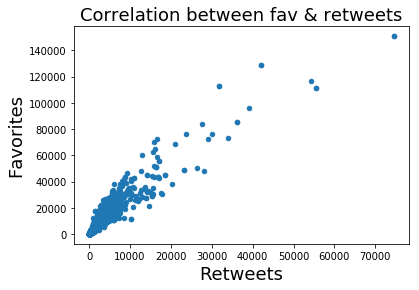

In [338]:
twitter_archive_clean.plot(x='retweets', y='favorites', kind='scatter')
plt.xlabel("Retweets", fontsize=18)
plt.ylabel("Favorites", fontsize=18)
plt.title('Correlation between fav & retweets', fontsize=18)

Text(0.5,1,'Correlation between fav & rate')

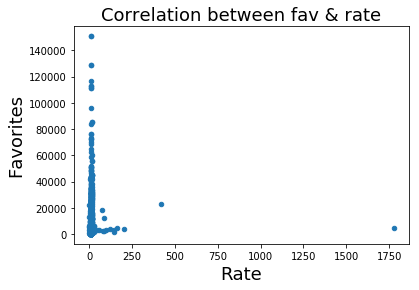

In [339]:
twitter_archive_clean.plot(x='rating_numerator', y='favorites', kind='scatter')
plt.xlabel("Rate", fontsize=18)
plt.ylabel("Favorites", fontsize=18)
plt.title('Correlation between fav & rate', fontsize=18)

In [340]:
df.corr()

,tweet_id,rating_numerator,rating_denominator,year,month,hour,retweets,favorites,img_num,confidence_1,breed_1,confidence_2,breed_2,confidence_3,breed_3
tweet_id,1.000000,0.024756,-0.020879,0.876131,-0.287048,0.145940,0.355339,0.574859,0.211113,0.102742,0.129458,0.006132,0.126633,-0.049980,0.098683
rating_numerator,0.024756,1.000000,0.196985,0.025289,-0.012781,0.011894,0.018003,0.016773,0.000801,-0.007385,-0.025989,-0.019736,-0.031402,-0.005997,-0.025899
rating_denominator,-0.020879,0.196985,1.000000,0.001013,-0.032680,-0.021045,-0.017321,-0.023675,-0.003061,-0.000223,-0.002374,-0.036737,-0.003939,-0.005577,0.001470
year,0.876131,0.025289,0.001013,1.000000,-0.712025,0.090991,0.309918,0.499889,0.203914,0.084562,0.132647,-0.001266,0.121664,-0.034850,0.091980
month,-0.287048,-0.012781,-0.032680,-0.712025,1.000000,0.028597,-0.097380,-0.156516,-0.098045,-0.018279,-0.074702,0.010533,-0.057000,-0.003632,-0.040938
hour,0.145940,0.011894,-0.021045,0.090991,0.028597,1.000000,0.050311,0.050509,0.040912,-0.001405,0.024751,0.005319,0.029500,-0.004536,0.025371
retweets,0.355339,0.018003,-0.017321,0.309918,-0.097380,0.050311,1.000000,0.934254,0.095379,0.041167,0.019619,-0.005625,0.008230,-0.038919,0.012735
favorites,0.574859,0.016773,-0.023675,0.499889,-0.156516,0.050509,0.934254,1.000000,0.122845,0.064355,0.059030,-0.008734,0.048843,-0.049143,0.037669
img_num,0.211113,0.000801,-0.003061,0.203914,-0.098045,0.040912,0.095379,0.122845,1.000000,0.207399,0.036255,-0.156719,0.062953,-0.142587,0.066163
confidence_1,0.102742,-0.007385,-0.000223,0.084562,-0.018279,-0.001405,0.041167,0.064355,0.207399,1.000000,0.136887,-0.507715,0.146190,-0.707717,0.126018
